In [1]:
### This was based on https://github.com/aclarkData/Journal-Entry-Machine-Learning
import pandas as pd

In [2]:
je_data = pd.read_csv("jan-je.xls")

C:\Users\jroge12\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
### Convert date object to date
je_data['Date'] = pd.to_datetime(je_data['Date'])

In [4]:
### Convert date to int
je_data['Date Int'] = pd.to_numeric(je_data['Date'])

In [5]:
je_data = je_data.fillna(0)

In [6]:
je_data.dtypes

Account                 object
Date            datetime64[ns]
Sum Amount             float64
Line Descr              object
Journal ID              object
User                    object
Unit                    object
Resource                object
Activity                object
Physical Loc            object
Project                 object
Currency                object
Date Int                 int64
dtype: object

In [7]:
from sklearn.feature_extraction import DictVectorizer

# Turn categorical features into 1-hot encoded features
categorical_features = je_data[['Account', 'User', 'Unit', 'Resource', 'Activity', 'Physical Loc', 'Project']]
#dv = DictVectorizer()
cat_matrix = DictVectorizer().fit_transform(categorical_features.T.to_dict().values())

In [8]:
# Collect the other numerical features
from scipy.sparse import hstack
other_features = je_data[['Sum Amount','Date Int']]
data_matrix = hstack([cat_matrix, other_features])

In [ ]:
from sklearn.preprocessing import scale
data_matrix = scale(data_matrix.todense())

In [9]:
from sklearn.cluster import KMeans
# define how many clusters and how many iterations. 
clustering_model = KMeans(n_clusters = 25, n_init= 10)
clustering_model.fit(data_matrix)

clusters = clustering_model.predict(data_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004E5529E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000090CC5E80>]], dtype=object)

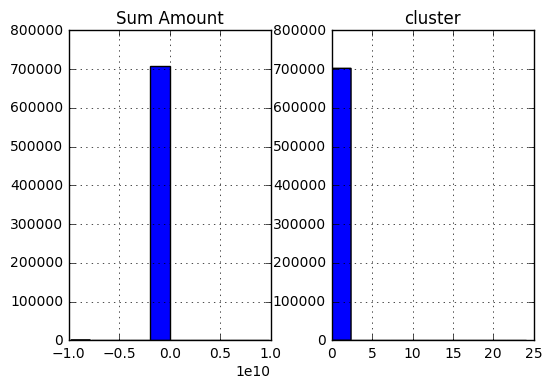

In [11]:
results = pd.DataFrame({'cluster' : clusters,'Account' : je_data['Account'],'Date' : je_data['Date'],
                        'Sum Amount' : je_data['Sum Amount'], 'Line Descr' : je_data['Line Descr'],
                        'Journal ID' : je_data['Journal ID'],'User' : je_data['User'],
                        'Unit' : je_data['Unit'],'Resource' : je_data['Resource'],
                        'Activity' : je_data['Activity'],'Physical Loc' : je_data['Physical Loc'],
                        'Project' : je_data['Project'],'Currency' : je_data['Currency']})
cluster_counts = results.groupby('cluster')['Sum Amount'].value_counts()
%matplotlib inline
results.hist()

In [12]:
#Group results by cluster
bycluster = results.groupby('cluster')

In [13]:
pd.set_option('display.precision',3)

In [14]:
#extract data per cluster where the the cluster has fewer than 20 values
kclusters=bycluster.filter(lambda x: len(x) < 20)

In [15]:
#export results
kclusters.to_excel('kmeans_je.xlsx', sheet_name='Sheet1')  